# 1. 프로젝트 목표 및 목적

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import warnings; warnings.filterwarnings('ignore')

%matplotlib inline

import os

In [2]:
print(tf.__version__)

2.4.1


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
!cd /content/gdrive/MyDrive/GraduationProject 
# MyDrive(내 드라이브)안에 바로가기를 만들면 된다. => "!"추가하여 바로가기 생성하지 않아도됨.

In [5]:
from subprocess import check_output
print(check_output(['ls']).decode('utf8'))

gdrive
sample_data



# 2. 관련 데이터 수집

- 구글 확장 프로그램 사용 및 오픈된 데이터를 이용하였다.

# 2-1. 데이터 전처리(`Data_Augmentation` 파일로 수행)

- Data Augmentation
  - 회전
  - 찌그러뜨리기
  - 확대
  - 좌우 반전
  - 조명
  - fill_mode = 'constant': 검정색으로 채움

- 인식률 높이기 
  ( Under some restrictions, such as lack of brightness, information of face etc. )
  - Adjusting Brightness
  - Adjusting Contrast
  - Crop ( 샘플 데이터에서의 안면이 치우쳐져 있는 경우가 많을 경우 )

## 데이터 불러오기

## Train 

In [6]:
os.chdir('/content/gdrive/MyDrive/GraduationProject/data/Train_Test/forTest/train/')

In [7]:
print(check_output(['ls']).decode('utf8'))

ahn_cheol_soo
Alejandro_Toledo
Alvaro_Uribe



In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
import cv2
import glob
from google.colab.patches import cv2_imshow

train_images = []
train_target_str = []
train_target = [] # 0부터 저장됨
idx = 0
data_folder = '/content/gdrive/MyDrive/GraduationProject/data/Train_Test/forTest/train'
folder_list = os.listdir(data_folder)
for folder in folder_list:
  print(folder)
  train_target_str.append(folder)
  files = glob.glob(os.path.join(folder, '*.jpg')) # 현재 경로의 것을 가져온다.
  for filename in files:
    temp = cv2.imread(filename, 0)
    train_images.append(temp)
    train_target.append(idx)
  idx += 1

Alejandro_Toledo
Alvaro_Uribe
ahn_cheol_soo


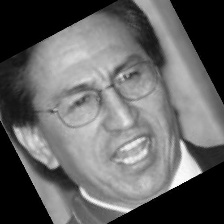

None
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
img = train_images[0]
print(cv2_imshow(img))
print(img)

- Target을 one-hot Encoding 처럼 애초에 숫자로 저장 
  - 이후 matching 가능하도록 target_str이라는 리스트.

In [11]:
print(train_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Test

In [12]:
os.chdir('/content/gdrive/MyDrive/GraduationProject/data/Train_Test/forTest/test/')

In [13]:
print(check_output(['ls']).decode('utf8'))

ahn_cheol_soo
Alejandro_Toledo
Alvaro_Uribe



In [14]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [15]:
import cv2
import glob
from google.colab.patches import cv2_imshow

test_images = []
test_target_str = []
test_target = [] # 0부터 저장됨
idx = 0
data_folder = '/content/gdrive/MyDrive/GraduationProject/data/Train_Test/forTest/test'
folder_list = os.listdir(data_folder)
for folder in folder_list:
  print(folder)
  test_target_str.append(folder)
  files = glob.glob(os.path.join(folder, '*.jpg')) # 현재 경로의 것을 가져온다.
  for filename in files:
    temp = cv2.imread(filename, 0)
    test_images.append(temp)
    test_target.append(idx)
  idx += 1

Alejandro_Toledo
Alvaro_Uribe
ahn_cheol_soo


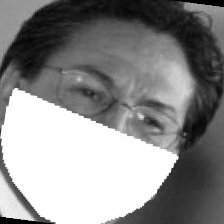

None
[[146 146 146 ...   0   0   2]
 [147 147 147 ...   0   0   0]
 [148 148 148 ...   2   4   0]
 ...
 [  0   2   1 ...  96  97  98]
 [  0   2   0 ...  97  98  99]
 [  0   0   0 ...  97  98  99]]


In [16]:
img = test_images[0]
print(cv2_imshow(img))
print(img)

- Target을 one-hot Encoding 처럼 애초에 숫자로 저장 
  - 이후 matching 가능하도록 target_str이라는 리스트.

In [17]:
print(train_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# 3. 학습을 위한 데이터 전처리

## Train

In [18]:
train_images = np.array(train_images)
train_target = np.array(train_target)

In [19]:
print(train_images.shape)
train_images = train_images.reshape(-1, 224, 224, 1)
print(train_images.shape)

(778, 224, 224)
(778, 224, 224, 1)


In [20]:
print(type(train_target))
train_target.shape

<class 'numpy.ndarray'>


(778,)

## Test

In [21]:
test_images = np.array(test_images)
test_target = np.array(test_target)

In [22]:
print(test_images.shape)
test_images = test_images.reshape(-1, 224, 224, 1)
print(test_images.shape)

(164, 224, 224)
(164, 224, 224, 1)


In [23]:
print(type(test_target))
test_target.shape

<class 'numpy.ndarray'>


(164,)

- scaling

In [24]:
train_images = train_images / 255.0

In [25]:
test_images = test_images / 255.0 

- Train/Test split
  - 전체 데이터에서 Augmentation 시킨 후 Train/Test를 나눠주면(ex. scikit-learn이용) Train에 있는 데이터가 Test에 있을 수 있기 때문에 **처음부터 Train/Test 폴더를 나눠서 Augmentation 시켜 주었다**

- Batch Normalization

# 4. 학습

- ResNet50
  - 224 x 224
- ResNet200
  - 320 x 320

### **학습 시 메모리 부족으로 훈련이 실패한다면 몇 가지 해결책**
1. mini-batch size 줄이기
2. stride를 이용하여 차원 축소
3. layer 제거
4. 32비트 부동소수 대신 16비트 부동소수 사용
5. 여러 장치에 CNN 분산

- 사전 훈련된 모델 이용

### ResNet-50


https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50

- ResNet-50은 224x224 크기의 사진을 넣어줘야 한다. 
  - 가로, 세로 비율 같다고 보고 resize -> **가장 가로, 세로 비율의 차이가 큰 사진들을 확인하여 충분히 식별 가능한 정도의 얼굴임을 확인하였다.**
  - 가로, 세로 비율이 다르다면 tf.image.crop_and_resize() 적용
  - **openCV 이용해서 미리 resize 시켜주었다.**

In [30]:
# 

### VGGNET

In [26]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(224, 224,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 256)     295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 256)       0

In [27]:
images_resized = tf.image.resize(train_images, [224, 224])

In [28]:
history = model.fit(images_resized, train_target, epochs = 25, validation_split = 0.2)

Epoch 1/25
20/20 [==============================] - 6s 144ms/step - loss: 6.8131 - accuracy: 0.4532 - val_loss: 3.0600 - val_accuracy: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 2s 98ms/step - loss: 0.8518 - accuracy: 0.5316 - val_loss: 3.0758 - val_accuracy: 0.1282
Epoch 3/25
20/20 [==============================] - 2s 98ms/step - loss: 0.7689 - accuracy: 0.5510 - val_loss: 4.0770 - val_accuracy: 0.0833
Epoch 4/25
20/20 [==============================] - 2s 98ms/step - loss: 0.6999 - accuracy: 0.5544 - val_loss: 4.5336 - val_accuracy: 0.1218
Epoch 5/25
20/20 [==============================] - 2s 98ms/step - loss: 0.6542 - accuracy: 0.6489 - val_loss: 5.4557 - val_accuracy: 0.1667
Epoch 6/25
20/20 [==============================] - 2s 98ms/step - loss: 0.5552 - accuracy: 0.7272 - val_loss: 7.5218 - val_accuracy: 0.1410
Epoch 7/25
20/20 [==============================] - 2s 98ms/step - loss: 0.5301 - accuracy: 0.7568 - val_loss: 7.7179 - val_accuracy: 0.1090
Epoch 8/

# 5. 평가 및 튜닝

- preprocess_input()은 0 ~ 255의 픽셀값을 가져야 한다. -> images_resized * 255

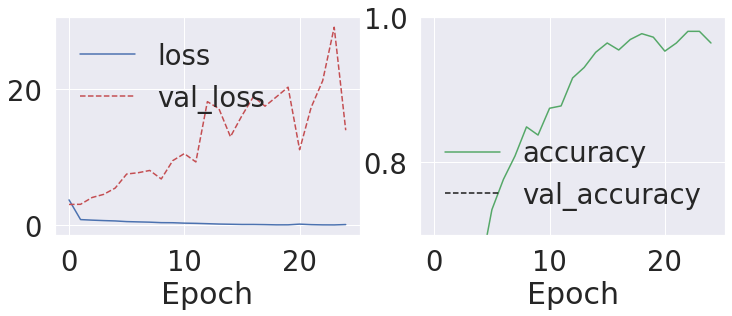

6/6 [==============================] - 0s 31ms/step - loss: 6.8550 - accuracy: 0.3537


[6.855042934417725, 0.353658527135849]

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_images, test_target)